# 1. Kiểm tra phiên bản các thư viện

In [6]:
import numpy as np
import pandas as pd
import sklearn

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Scikit-learn:", sklearn.__version__)


NumPy: 2.2.4
Pandas: 2.2.3
Scikit-learn: 1.6.1


# 2. Huấn luyện mô hình
- Sử dụng model Random Forest
- Dự báo lượng mưa trong 6 giờ tới. Sử dụng dữ liệu của 6 tiếng trước

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


file_path = "./data.xlsx"
df = pd.read_excel(file_path)

df.head()

,i,j,AWS,CAPE,CIN,EWSS,IE,ISOR,KX,PEV,...,SLHF,SLOR,SSHF,TCLW,TCW,TCWV,U250,U850,V250,V850
0,0,114,0.0,446.125,38.875008,-641.113281,-0.000014,0.588248,37.360176,-0.000016,...,-127783,0.019673,-11962,0.723206,49.239563,48.219376,25.793488,-3.606674,4.523453,7.328094
1,0,116,0.0,624.125,79.875008,-468.113281,-0.000026,0.315002,35.903145,-0.000026,...,-207399,0.008039,28742,0.581421,48.919250,48.055313,28.781769,-2.479721,4.257828,7.910126
2,0,118,0.0,624.125,79.875008,-468.113281,-0.000026,0.315002,35.903145,-0.000026,...,-207399,0.008039,28742,0.581421,48.919250,48.055313,28.781769,-2.479721,4.257828,7.910126
3,0,119,0.0,624.125,79.875008,-468.113281,-0.000026,0.315002,35.903145,-0.000026,...,-207399,0.008039,28742,0.581421,48.919250,48.055313,28.781769,-2.479721,4.257828,7.910126
4,0,122,0.0,646.875,129.296875,-445.113281,-0.000030,0.407749,33.662910,-0.000039,...,-207719,0.002134,29126,0.420837,46.876282,46.242813,31.621613,0.049576,4.226578,7.316376


# 3. Đánh giá
- Tạo dữ liệu đầu vào với thông tin của 6 giờ trước
- Tạo cột thời gian giả định để xử lý dữ liệu dạng chuỗi thời gian
- Tạo các cột đầu vào từ 6 giừo trước
- Xoá các dòng có giá trị NaN
- Chia dữ liệu thàn tập train và test
- Khởi tạo model RandomForest
- Dự đoán trên tập test
- Đánh giá


In [8]:
time_steps = 6

df['time'] = np.arange(len(df))

for t in range(1, time_steps + 1):
    df[f'AWS_t-{t}'] = df['AWS'].shift(t)

# Xóa các dòng có giá trị NaN
df.dropna(inplace=True)

features = [col for col in df.columns if col not in ['AWS', 'i', 'j', 'time']]
target = 'AWS'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2
print(f"MAE: {mae}, RMSE: {rmse}, R2: {r2}")


MAE: 0.10298412816439356, RMSE: 0.442762792882309, R2: -5.265447005080071


In [9]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tạo nhãn cho 6 giờ tiếp theo
df["AWS_6h"] = df["AWS"].shift(-6)

# Loại bỏ các dòng bị NaN (do dịch 6 giờ)
df.dropna(inplace=True)

# Loại bỏ các cột không cần thiết (i, j) sau khi đã xử lý NaN
X = df.drop(columns=["i", "j", "AWS", "AWS_6h"])
y = df["AWS_6h"]

# Chia tập train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình RandomForest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")


MAE: 0.11, MSE: 0.18, RMSE: 0.43


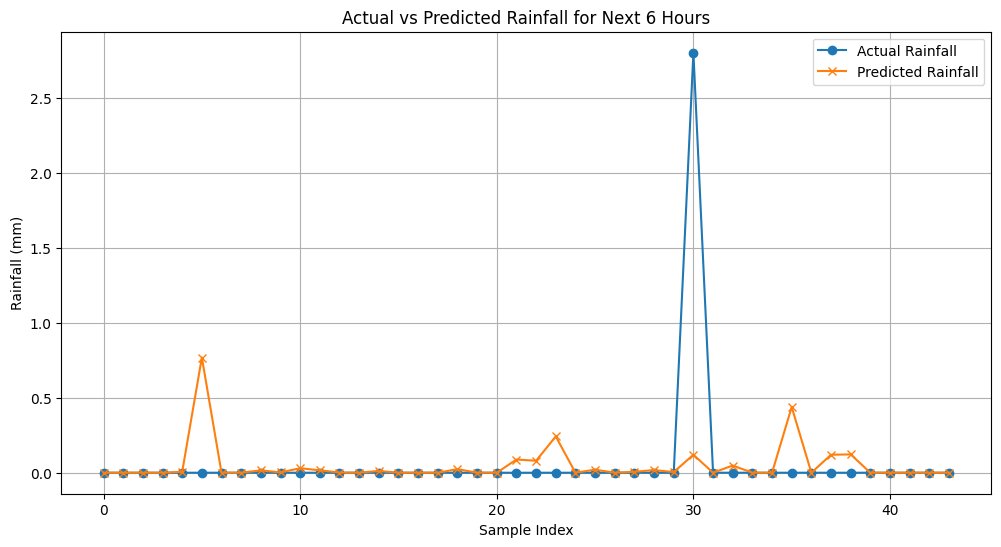

In [10]:
import matplotlib.pyplot as plt
num_samples = 50
y_actual = y_test[:num_samples].values
y_predicted = y_pred[:num_samples]

plt.figure(figsize=(12, 6))
plt.plot(y_actual, label="Actual Rainfall", marker='o')
plt.plot(y_predicted, label="Predicted Rainfall", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (mm)")
plt.title("Actual vs Predicted Rainfall for Next 6 Hours")
plt.legend()
plt.grid()
plt.show()


# 4. Các mô hình khác


## 1. RandomForest/ XGBoost

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dữ liệu
df = pd.read_excel("data.xlsx")

# Xóa các cột không cần thiết
df = df.drop(columns=["i", "j"])  

# Chia dữ liệu thành input (X) và output (y)
X = df.drop(columns=["AWS"])  # Các feature
y = df["AWS"]  # Nhãn

# Chia thành tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Huấn luyện mô hình XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Dự đoán
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Đánh giá hiệu suất
rf_mse = mean_squared_error(y_test, rf_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

rf_rmse = np.sqrt(rf_mse)
xgb_rmse = np.sqrt(xgb_mse)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")


Random Forest RMSE: 0.5606773956642446
XGBoost RMSE: 0.5709500115837635


## 2. Mô hình LSTM (Dự báo theo thời gian)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
df = pd.read_excel("data.xlsx")
# df = df[df['AWS'].notna()]
print("Đã đọc dữ liệu")

Đã đọc dữ liệu


In [40]:
features = ["AWS"]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[features])
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, time_steps)

In [41]:
#train 80%, test 20%
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [42]:
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

c:\Users\giakh\miniconda3\envs\ai_train\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)

In [44]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0172

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0155 - val_loss: 3.9072e-07
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0054 - val_loss: 1.0606e-04
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0083 - val_loss: 5.8520e-05
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0065 - val_loss: 1.9565e-05
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0055 - val_loss: 2.9787e-05
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045 - val_loss: 7.8081e-05
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0027 - val_loss: 6.1788e-05
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0106 - val_loss: 9.3789e-05
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0046 - val_loss: 4.7473e-05
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - val_loss: 3.7720e-05
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0016 - val_loss: 1.3869e-05


In [45]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 889ms/step


In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"LSTM RMSE: {rmse}")
print(f"LSTM MAE: {mae}")
print(f"LSTM R2: {r2}")

LSTM RMSE: 0.0006250787371149097
LSTM MAE: 0.0006250787371148666
LSTM R2: 0.0


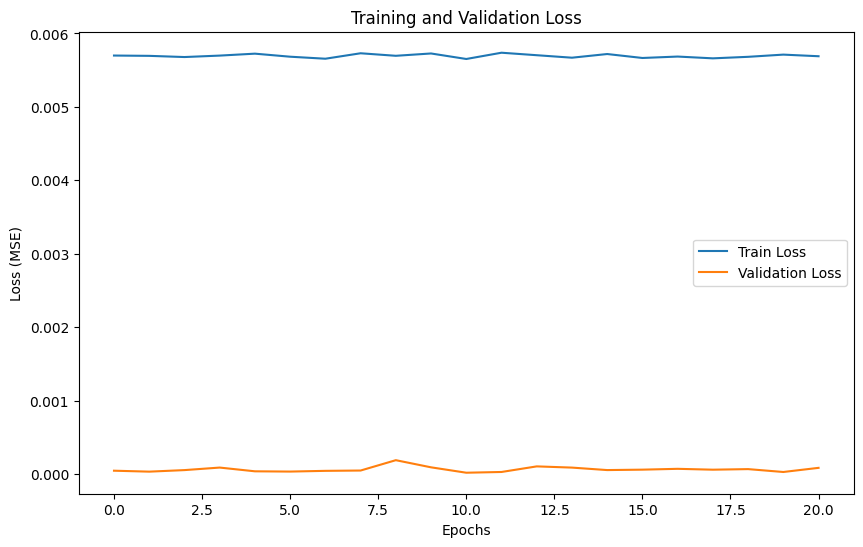

In [35]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

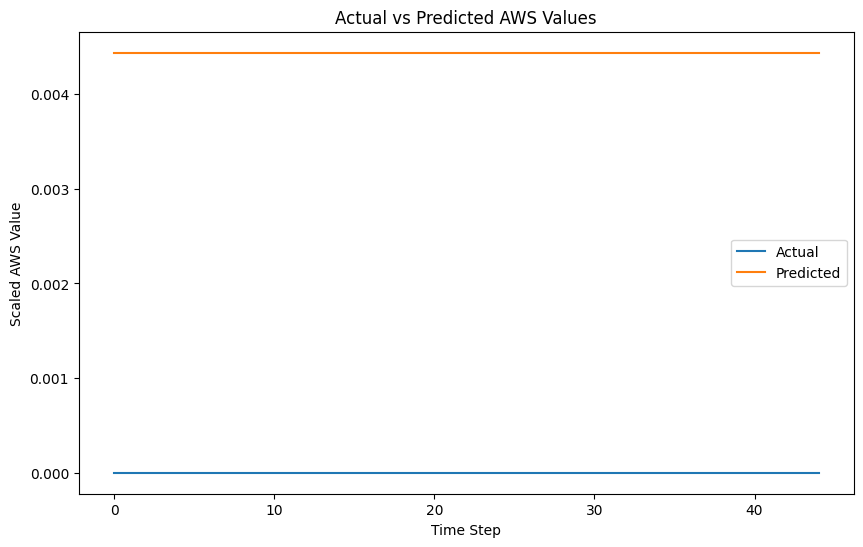

In [36]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted AWS Values")
plt.xlabel("Time Step")
plt.ylabel("Scaled AWS Value")
plt.legend()
plt.show()

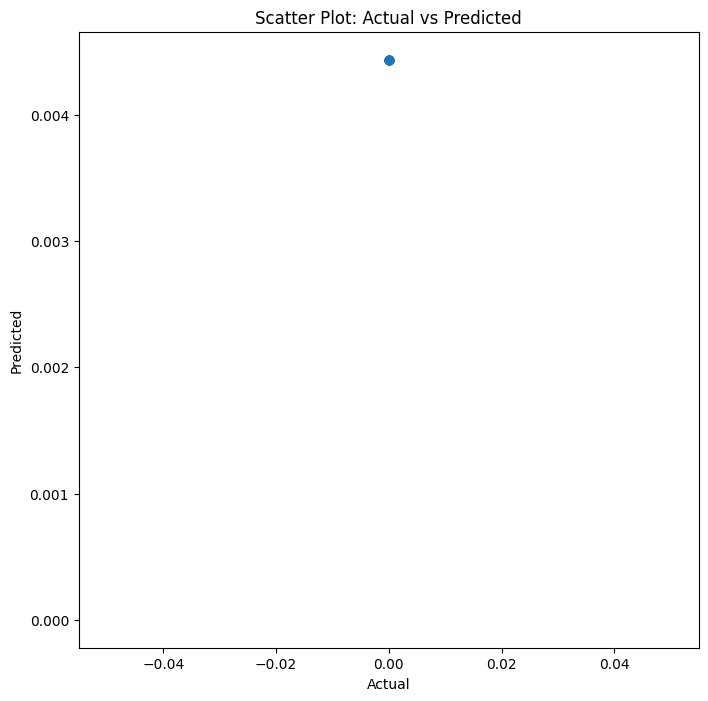

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter Plot: Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()